In [135]:
import matplotlib
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import time
import pandas as pd
from collections import Counter

### Klasa KNN

In [136]:
def euc_dist(x0, x1):
  #oblicza odległość euklidesową
  dist = np.sqrt(np.sum((x0-x1)**2))
  return dist


#https://www.youtube.com/watch?v=rTEtEy5o3X0
class KNN:
  def __init__(self, k_neighbors = 1, useKDTree = False):
    self.k_neighbors = k_neighbors
    self.useKDTree = useKDTree

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    #oblicza dystans
    distances = [euc_dist(x, x_train) for x_train in self.X_train]

    #wybiera etykiety k najbliższych sąsiadów
    indices = np.argsort(distances)[:self.k_neighbors]
    nearest_labels = [self.y_train[i] for i in indices]

    #wybiera najczęściej występującą wartość
    most_common = mode(nearest_labels)
    return most_common


  def predict_regression(self, X):
    predictions = [self._predict_regression(x) for x in X]
    return predictions

  def _predict_regression(self, x):
    #oblicza dystans
    distances = [euc_dist(x, x_train) for x_train in self.X_train]

    #wybiera etykiety k najbliższych sąsiadów
    indices = np.argsort(distances)[:self.k_neighbors]
    nearest_labels = [self.y_train[i] for i in indices]

    #wybiera średnią wartość
    mean = np.mean(nearest_labels)
    return mean

  def score(self, X, y):
    y_pred = self.predict(X)
    #zlicza trafienia pozytywne/ilość predykcji
    acc = np.sum(y_pred == y) / len(y)
    return acc

  def score_regression(self, X, y):
    y_pred = self.predict_regression(X)
    #oblicza błąd średniokwadratowy
    acc = mean_squared_error(y, y_pred)
    return acc

# 3. Klasyfikacja

Zadanie 3.1

In [141]:
X, y = datasets.make_classification(
      n_samples=100,
      n_features=2,
      n_informative=2,
      n_redundant=0,
      n_repeated=0,
      random_state=3
  )

Zadanie 3.2, 3.3.



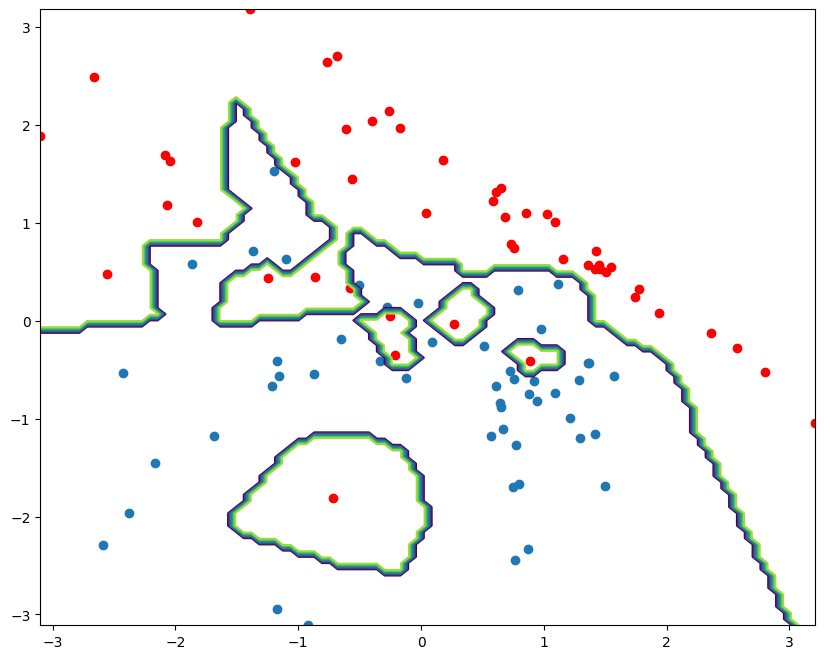

In [142]:
#wizualizacja
plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'o')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'ro')

knn = KNN(1)
knn.fit(X, y)
pr = knn.predict(X)
points = 100
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]), np.max(X[:, 0]), points), np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), points))
dane = np.vstack([xx.ravel(), yy.ravel()]).T
pred = knn.predict(dane)
pred = np.array(pred).reshape(points, points)
plt.contour(xx, yy, pred)

Zadanie 3.4, 3.5.

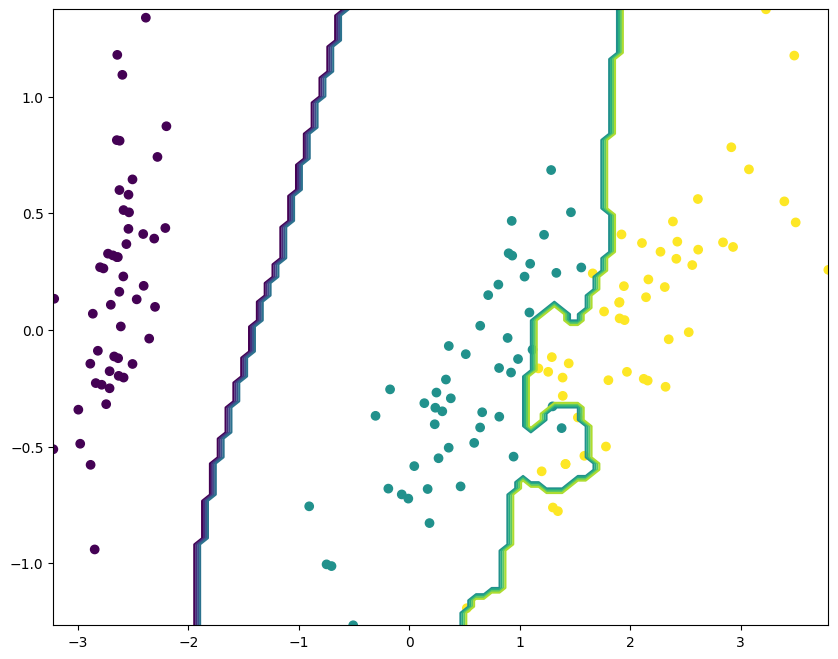

In [143]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
knn = KNN(1)
knn.fit(X, y)
points=100
xx, yy = np.meshgrid(np.linspace(min(X_r[:, 0]), max(X_r[:, 0]), points), np.linspace(min(X_r[:, 1]),max(X_r[:, 1]), points)) #a
dane = np.vstack([xx.ravel(), yy.ravel()]).T
dane_r = pca.inverse_transform(dane) #b
pred = knn.predict(dane_r) #c
pred = np.array(pred).reshape(100, 100)
plt.figure(figsize=(10, 8))
plt.scatter(X_r[:, 0], X_r[:, 1], c=y)
plt.contour(xx, yy, pred)

Zadanie 3.6

In [144]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

res = {'k': [], 'acc': []}
for k in range(1, 51):
  accs = []
  for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNN(k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accs.append(acc)
  mean_accuracy = np.mean(accs)
  res['k'].append(k)
  res['acc'].append(mean_accuracy)

df = pd.DataFrame(res)
df

,k,acc
0,1,0.960000
1,2,0.960000
2,3,0.960000
3,4,0.960000
4,5,0.966667
5,6,0.960000
6,7,0.966667
7,8,0.966667
8,9,0.966667
9,10,0.953333


# 4. Regresja

Zadanie 4.1, 4.2, 4.3

Błąd średniokwadratowy: 0.3978087673685691


<Figure size 1000x800 with 0 Axes>

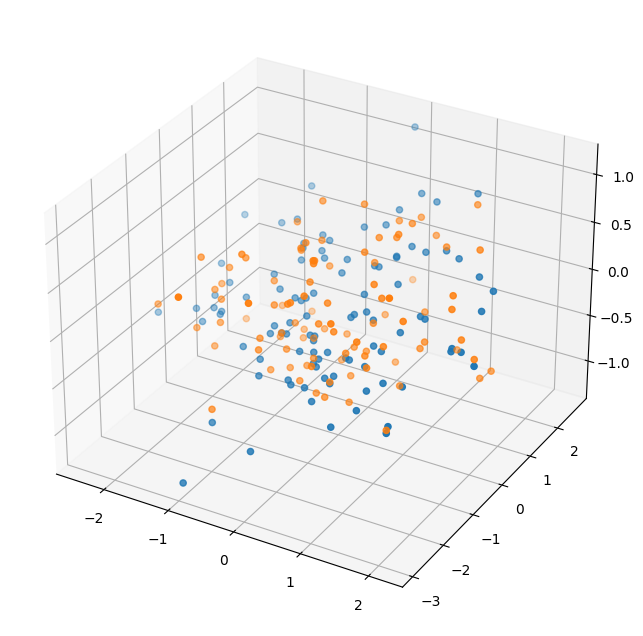

In [145]:
X, y = datasets.make_regression(
    n_samples = 100,
    n_features = 2,
    n_informative = 1,
    noise = 0,
    random_state = 3
)
knn = KNN(7)
knn.fit(X, y)
plt.figure(figsize=(10, 8))

n_points=10
xx, yy =np.meshgrid(np.linspace(min(X[:,0]),max(X[:,0]),n_points) , np.linspace(min(X[:,1]),max(X[:,1]),n_points))
data = np.vstack([xx.ravel(), yy.ravel()]).T
pred = np.array(knn.predict_regression(data))
ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], y)
ax.scatter3D(X[:, 0], X[:, 1], pred)
print("Błąd średniokwadratowy:", knn.score_regression(data, y))


Zadanie 4.4

In [146]:
#błąd przy użyciu load_boston(), użycie rozwiązania proponowanego przez środowisko
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [148]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

res = {'k': [], 'mse': []}
for k in range(1, 11):
  mses = []
  for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNN(k)
    knn.fit(X_train, y_train)
    mse = knn.score_regression(X_test, y_test)
    mses.append(mse)
  mean_mse = np.mean(mses)
  res['k'].append(k)
  res['mse'].append(mean_mse)

df = pd.DataFrame(res)
df

,k,mse
0,1,48.534091
1,2,40.486285
2,3,36.856818
3,4,37.448223
4,5,37.416904
5,6,38.024544
6,7,39.478106
7,8,39.647714
8,9,41.010673
9,10,42.016062
